In [2]:
import mne
import numpy as np

In [13]:
raw = mne.io.read_raw_edf(r'C:\Users\ayvazquez\aylin\BCI_UNL_AllisonPeterson_course\final_course_project\data\SN001.edf', preload=True)
raw

Extracting EDF parameters from C:\Users\ayvazquez\aylin\BCI_UNL_AllisonPeterson_course\final_course_project\data\SN001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


C:\Users\ayvazquez\AppData\Local\Temp\ipykernel_13748\3689000016.py:1: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(r'C:\Users\ayvazquez\aylin\BCI_UNL_AllisonPeterson_course\final_course_project\data\SN001.edf', preload=True)
C:\Users\ayvazquez\AppData\Local\Temp\ipykernel_13748\3689000016.py:1: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(r'C:\Users\ayvazquez\aylin\BCI_UNL_AllisonPeterson_course\final_course_project\data\SN001.edf', preload=True)


Reading 0 ... 6566399  =      0.000 ... 25649.996 secs...


<RawEDF | SN001.edf, 8 x 6566400 (25650.0 s), ~400.8 MB, data loaded>

In [190]:
raw.info['ch_names']

['EEG F4-M1',
 'EEG C4-M1',
 'EEG O2-M1',
 'EEG C3-M2',
 'EMG chin',
 'EOG E1-M2',
 'EOG E2-M2',
 'ECG']

In [17]:
raw.info['ch_names']
fs = raw.info['sfreq']
fs

256.0

In [35]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import savefig as sf
from scipy.signal import iirnotch, filtfilt, butter, sosfiltfilt

In [34]:
def filter_signal(signal, Wn, fs):
    b, a = iirnotch(50, 30, fs)
    signal_notch = filtfilt(b, a, signal)
    sos = butter(2**3, Wn, btype='bandpass', output='sos', fs=fs)
    return sosfiltfilt(sos, signal_notch)

In [188]:
epoch = 160
start = int(fs*epoch*30)
end = start + int(30*fs)
eeg = np.ravel(raw.get_data(picks='EEG C4-M1'))[start:end]
eeg = filter_signal(eeg, [0.5, 35], fs)*1e6
emg = np.ravel(raw.get_data(picks='EMG chin'))[start:end]
emg = filter_signal(emg, [10, 90], fs)*1e6
eog = np.ravel(raw.get_data(picks='EOG E1-M2'))[start:end]
eog = filter_signal(eog, [0.5, 10], fs)*1e6

t = np.linspace(0,30, len(eeg))

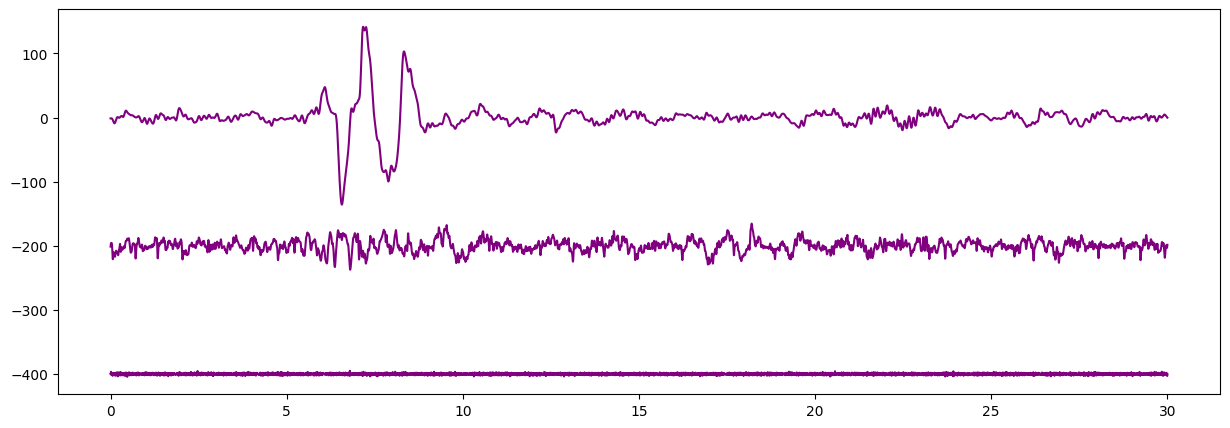

In [189]:
plt.figure(figsize=(15,5))
plt.plot(t, eog, color='purple')
plt.plot(t, eeg-200, color='purple')
plt.plot(t, emg-400, color='purple')
sf('REM.png', transparent=True)

In [4]:
raw.info['ch_names']

['EEG F4-M1',
 'EEG C4-M1',
 'EEG O2-M1',
 'EEG C3-M2',
 'EMG chin',
 'EOG E1-M2',
 'EOG E2-M2',
 'ECG']

In [5]:
raw.info['sfreq']

256.0

In [6]:
np.random.randn(20, 3).shape

(20, 3)

In [7]:
np.array([raw.get_data()[0][:int(raw.info['sfreq']*30)],raw.get_data()[1][:int(raw.info['sfreq']*30)]]).T.shape

(7680, 2)

In [9]:
import pandas as pd

# Ruta del archivo .txt (asegúrate de colocar la ruta correcta)
file_path = r'SN001_sleepscoring.txt'

# Leer el archivo .txt en un DataFrame
# Asegúrate de que el delimitador (sep) sea el correcto, aquí uso tabulación '\t' como ejemplo.
df = pd.read_csv(file_path, sep='\t')

# Verificar las primeras filas y columnas del DataFrame
print(df.head())
print(df.columns)


  Date, Time, Recording onset, Duration, Annotation, Linked channel
0         01.01.01, 23.59.30, 0, 30, Sleep stage W,                
1        02.01.01, 00.00.00, 30, 30, Sleep stage W,                
2  02.01.01, 00.00.03.430, 33.43, 0, Lights off, ...               
3        02.01.01, 00.00.30, 60, 30, Sleep stage W,                
4        02.01.01, 00.01.00, 90, 30, Sleep stage W,                
Index(['Date, Time, Recording onset, Duration, Annotation, Linked channel'], dtype='object')


In [10]:
df.columns

Index(['Date, Time, Recording onset, Duration, Annotation, Linked channel'], dtype='object')

## Sleep stages

In [11]:
import pandas as pd
import yasa
from matplotlib import pyplot as plt

In [12]:
def read_scoring_file(file_path):
    df = pd.read_csv(file_path, sep=', ')
    df['Annotation'] = df['Annotation'].str.rstrip(',')
    return df

def correct_stage(stg):
    if stg == 'W':
        stg_corrected = 0
    elif stg == 'N1':
        stg_corrected = 1
    elif stg == 'N2':
        stg_corrected = 2
    elif stg == 'N3':
        stg_corrected = 3
    elif stg == 'R':
        stg_corrected = 4
    else:
        stg_corrected = 'problem'
    return stg_corrected

def get_scoring(df):
    all_stages = ['W', 'N1', 'N2', 'N3', 'R']
    stages = df['Annotation'].apply(lambda x: x.split()[-1]).tolist()
    stages = [correct_stage(i) for i in stages if i in all_stages]
    return stages

/tmp/ipykernel_28853/1966486097.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, sep=', ')


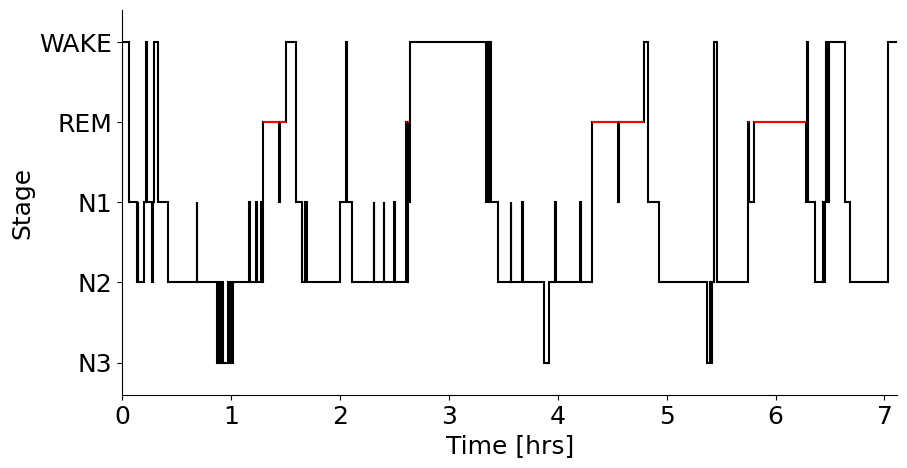

/tmp/ipykernel_28853/1966486097.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, sep=', ')


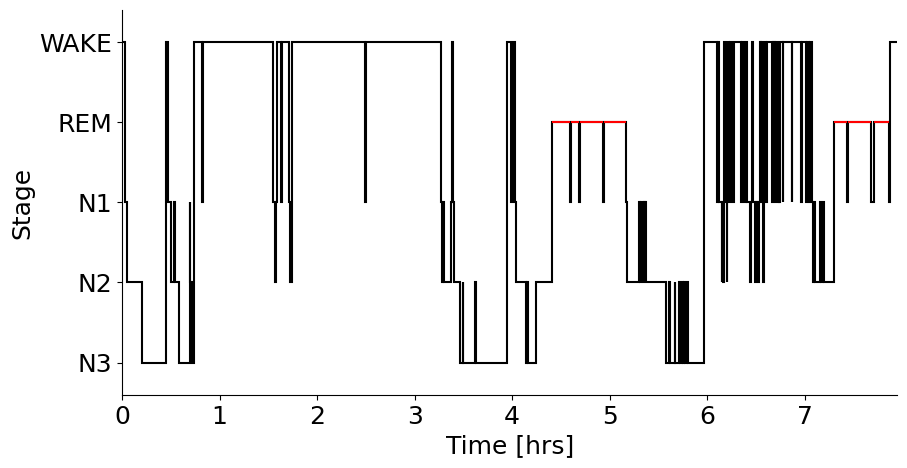

/tmp/ipykernel_28853/1966486097.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, sep=', ')


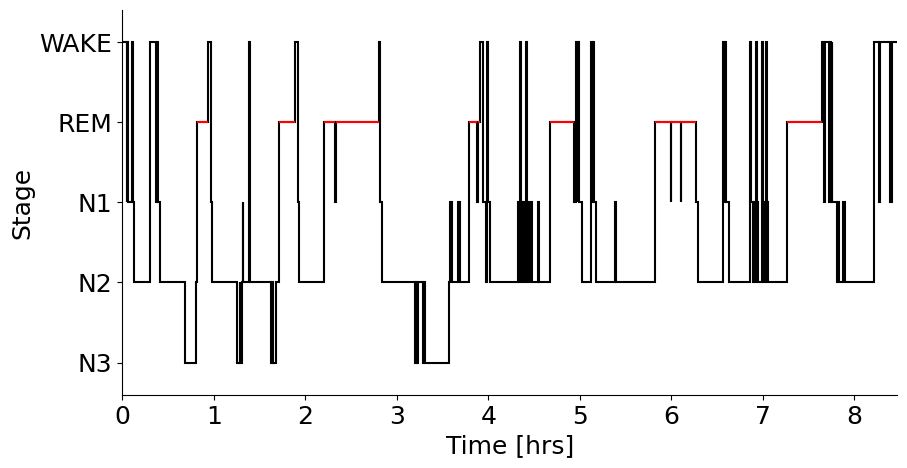

In [14]:
files_path = [r'SN001_sleepscoring.txt',
             r'SN003_sleepscoring.txt',
             r'SN004_sleepscoring.txt']

for file_path in files_path:
    df = read_scoring_file(file_path)
    stages = get_scoring(df)
    plt.figure(figsize=(10,5))
    yasa.plot_hypnogram(stages)
    plt.show()

<AxesSubplot:xlabel='Time [hrs]', ylabel='Stage'>

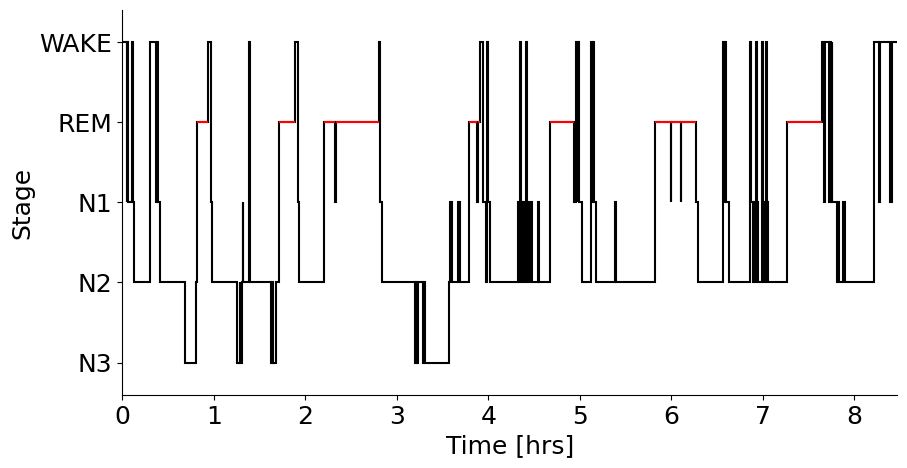

In [15]:
plt.figure(figsize=(10,5))
yasa.plot_hypnogram(stages)